### Logistic模型构建

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
sports = pd.read_csv("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Run or Walk.csv")
print(sports[0:3])

        date                time username  activity  ...  acceleration_z  gyro_x  gyro_y  gyro_z
0  2017/6/30  13:51:15:847724020   viktor         0  ...         -0.0076 -0.0590  0.0325 -2.9296
1  2017/6/30  13:51:16:246945023   viktor         0  ...         -0.2344 -0.1757  0.0208  0.1269
2  2017/6/30  13:51:16:446233987   viktor         0  ...          0.0722 -0.9105  0.1063 -2.4367

[3 rows x 10 columns]


In [5]:
predictors = sports.columns[4:] # 提取出所有自变量名称
X = sports.loc[:, predictors] # 构建自变量矩阵
y = sports.activity # 提取y变量值
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1234) # 构建训练集和测试集

In [6]:
# 训练模型
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train, y_train)
# 返回模型各个参数
print(sklearn_logistic.intercept_, sklearn_logistic.coef_)

[4.36637441] [[ 0.48695898  6.87517973 -2.44872468 -0.01385936 -0.16085022  0.13389695]]


### 模型预测

In [8]:
sklearn_predict = sklearn_logistic.predict(X_test) # 模型预测
pd.Series(sklearn_predict).value_counts() # 预测结果统计

0    12119
1    10028
dtype: int64

### 模型评估

#### 混淆矩阵

In [10]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, sklearn_predict, labels=[0, 1]) # 混淆矩阵
cm

array([[9969, 1122],
       [2150, 8906]], dtype=int64)

#### 评估指标

In [17]:
Accuracy = metrics.accuracy_score(y_test, sklearn_predict)
Precision = metrics.precision_score(y_test, sklearn_predict)
Recall = metrics.recall_score(y_test, sklearn_predict)
F1_score = metrics.f1_score(y_test, sklearn_predict)
print('模型准确率（Accuracy）为%.2f%%：'%(Accuracy*100))
print('模型精确率（Precision）为%.2f%%：'%(Precision*100))
print('模型召回率（Recall）为%.2f%%：'%(Recall*100))
print('模型F1-score为%.2f%%：'%(F1_score*100))

模型准确率（Accuracy）为85.23%：
模型精确率（Precision）为88.81%：
模型召回率（Recall）为80.55%：
模型F1-score为84.48%：


#### ROC曲线

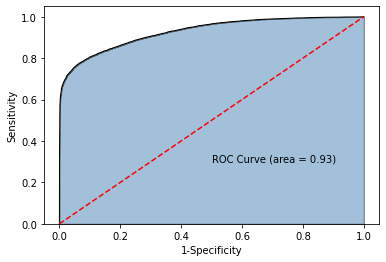

In [19]:
import matplotlib.pyplot as plt
y_score = sklearn_logistic.predict_proba(X_test)[:, 1] # y得分为模型预测正例的概率
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score) # 计算不同阈值下，fpr和tpr的组合值
roc_auc = metrics.auc(fpr, tpr) # 计算AUC值

plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black') # 绘制面积图
plt.plot(fpr, tpr, color='black', lw=1) # 添加ROC曲线轮廓
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # 添加对角线
plt.text(0.5, 0.3, 'ROC Curve (area = %0.2f)' % roc_auc) # 添加文本信息
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

### statsmodels中的LogisticRegression

In [35]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)
sm_logistic = sm.Logit(y_train, X_train2).fit() # 拟合Logistic模型
print(sm_logistic.summary()) # 模型详细信息

Optimization terminated successfully.
         Current function value: 0.324875
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               activity   No. Observations:                66441
Model:                          Logit   Df Residuals:                    66434
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.5313
Time:                        15:25:02   Log-Likelihood:                -21585.
converged:                       True   LL-Null:                       -46053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3885      0.049     90.296      0.000       4.293       4.484
acceleration_x   

In [36]:
sm_y_probability = sm_logistic.predict(X_test2) # 模型在测试集上的预测
sm_pred_y = np.where(sm_y_probability >= 0.5, 1, 0) # 根据概率值，将观测进行分类，以0.5作为阈值
cm = metrics.confusion_matrix(y_test, sm_pred_y, labels=[0, 1]) # 混淆矩阵
cm

array([[9967, 1124],
       [2149, 8907]], dtype=int64)